In [1]:
import csv
import pandas as pd

In [2]:
csv.field_size_limit(100000000)

phish_df = pd.read_csv('TREC_05.csv', engine = 'python', quoting = csv.QUOTE_MINIMAL)
phish_df.head()

,sender,receiver,date,subject,body,label,urls
0,"""Hu, Sylvia"" <Sylvia.Hu@ENRON.com>","""Acevedo, Felecia"" <Felecia.Acevedo@ENRON.com>...","Fri, 29 Jun 2001 08:36:09 -0500","FW: June 29 -- BNA, Inc. Daily Labor Report",User ID: enrondlr PW: bnaweb22 -----O...,0.0,1.0
1,"""Webb, Jay"" <Jay.Webb@ENRON.com>","""Lambie, Chris"" <Chris.Lambie@ENRON.com>","Fri, 29 Jun 2001 09:37:04 -0500",NGX failover plan.,"\nHi Chris, \n\nTonight we are rolling out a ...",0.0,0.0
2,"""Symms, Mark"" <Mark.Symms@ENRON.com>","""Thomas, Paul D."" <Paul.D.Thomas@ENRON.com>","Fri, 29 Jun 2001 08:39:30 -0500",RE: Intranet Site,Rika r these new?\n\n -----Original Message---...,0.0,1.0
3,"""Thorne, Judy"" <Judy.Thorne@ENRON.com>","""Grass, John"" <John.Grass@ENRON.com>, ""Nemec, ...","Fri, 29 Jun 2001 10:35:17 -0500",FW: ENA Upstream Company information,"John/Gerald, We are currently trading under GT...",0.0,0.0
4,"""Williams, Jason R (Credit)"" <Jason.R.Williams...","""Nemec, Gerald"" <Gerald.Nemec@ENRON.com>, ""Dic...","Fri, 29 Jun 2001 10:40:02 -0500",New Master Physical,Gerald and Stacy -\n\nAttached is a worksheet ...,0.0,0.0


In [3]:
phish_df.isna().sum()

sender        16
receiver    2218
date        1795
subject     1896
body         577
label        715
urls         715
dtype: int64

In [4]:
phish_df.shape

(55990, 7)

In [5]:
phish_df = phish_df.drop(columns = ['receiver'])
phish_df.head()

,sender,date,subject,body,label,urls
0,"""Hu, Sylvia"" <Sylvia.Hu@ENRON.com>","Fri, 29 Jun 2001 08:36:09 -0500","FW: June 29 -- BNA, Inc. Daily Labor Report",User ID: enrondlr PW: bnaweb22 -----O...,0.0,1.0
1,"""Webb, Jay"" <Jay.Webb@ENRON.com>","Fri, 29 Jun 2001 09:37:04 -0500",NGX failover plan.,"\nHi Chris, \n\nTonight we are rolling out a ...",0.0,0.0
2,"""Symms, Mark"" <Mark.Symms@ENRON.com>","Fri, 29 Jun 2001 08:39:30 -0500",RE: Intranet Site,Rika r these new?\n\n -----Original Message---...,0.0,1.0
3,"""Thorne, Judy"" <Judy.Thorne@ENRON.com>","Fri, 29 Jun 2001 10:35:17 -0500",FW: ENA Upstream Company information,"John/Gerald, We are currently trading under GT...",0.0,0.0
4,"""Williams, Jason R (Credit)"" <Jason.R.Williams...","Fri, 29 Jun 2001 10:40:02 -0500",New Master Physical,Gerald and Stacy -\n\nAttached is a worksheet ...,0.0,0.0


In [6]:
phish_df = phish_df.dropna()
phish_df.shape

(52886, 6)

In [7]:
import string

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

phish_df['subject'] = phish_df['subject'].apply(clean_text)
phish_df['body'] = phish_df['body'].apply(clean_text)
phish_df['sender'] = phish_df['sender'].apply(clean_text)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = lambda text: text.split())

phish_df['subject_tokens'] = phish_df['subject'].apply(lambda x: vectorizer.build_tokenizer()(x))
phish_df['body_tokens'] = phish_df['body'].apply(lambda x: vectorizer.build_tokenizer()(x))

phish_df.head()

,sender,date,subject,body,label,urls,subject_tokens,body_tokens
0,hu sylvia sylviahuenroncom,"Fri, 29 Jun 2001 08:36:09 -0500",fw june 29 bna inc daily labor report,user id enrondlr pw bnaweb22 original...,0.0,1.0,"[fw, june, 29, bna, inc, daily, labor, report]","[user, id, enrondlr, pw, bnaweb22, original, m..."
1,webb jay jaywebbenroncom,"Fri, 29 Jun 2001 09:37:04 -0500",ngx failover plan,\nhi chris \n\ntonight we are rolling out a n...,0.0,0.0,"[ngx, failover, plan]","[hi, chris, tonight, we, are, rolling, out, a,..."
2,symms mark marksymmsenroncom,"Fri, 29 Jun 2001 08:39:30 -0500",re intranet site,rika r these new\n\n original message\nfrom \t...,0.0,1.0,"[re, intranet, site]","[rika, r, these, new, original, message, from,..."
3,thorne judy judythorneenroncom,"Fri, 29 Jun 2001 10:35:17 -0500",fw ena upstream company information,johngerald we are currently trading under gtc ...,0.0,0.0,"[fw, ena, upstream, company, information]","[johngerald, we, are, currently, trading, unde..."
4,williams jason r credit jasonrwilliamsenroncom,"Fri, 29 Jun 2001 10:40:02 -0500",new master physical,gerald and stacy \n\nattached is a worksheet f...,0.0,0.0,"[new, master, physical]","[gerald, and, stacy, attached, is, a, workshee..."


In [9]:
phish_df['label'].value_counts()

label
0.0    31503
1.0    21383
Name: count, dtype: int64

In [10]:
from sklearn.utils import resample

phishing_emails = phish_df[phish_df['label'] == 1]
safe_emails = phish_df[phish_df['label'] == 0]

phishing_upsampled = resample(phishing_emails,
                              replace = True,
                              n_samples = len(safe_emails),
                              random_state = 42)

phish_df = pd.concat([safe_emails, phishing_upsampled])
phish_df = phish_df.sample(frac = 1, random_state = 42).reset_index(drop = True)

phish_df['label'].value_counts()

label
1.0    31503
0.0    31503
Name: count, dtype: int64

In [11]:
x = phish_df[['subject', 'body']]
y = phish_df['label']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

vectorizer = CountVectorizer(stop_words = 'english')

x_train_vec = vectorizer.fit_transform(x_train['subject'] + ' ' + x_train['body'])
x_test_vec = vectorizer.transform(x_test['subject'] + ' ' + x_test['body'])

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(x_train_vec, y_train)

y_pred = rf_model.predict(x_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Accuracy: 0.9869068401840978
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      6295
         1.0       0.99      0.98      0.99      6307

    accuracy                           0.99     12602
   macro avg       0.99      0.99      0.99     12602
weighted avg       0.99      0.99      0.99     12602



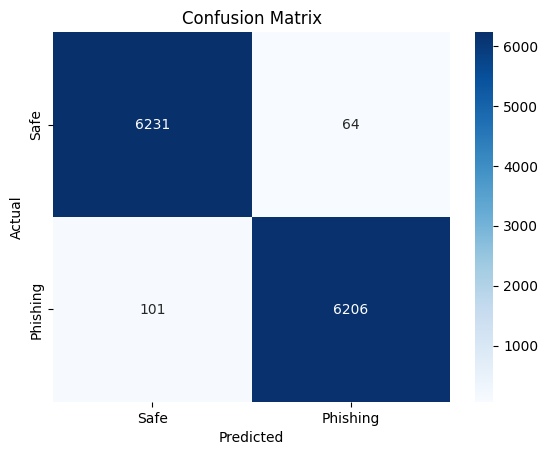

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Safe', 'Phishing'], yticklabels = ['Safe', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
import pickle

with open('phishing_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)
    
with open('phishing_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [18]:
with open('phishing_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
    
with open('phishing_vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

test_emails = [
    "Dear user, your PayPal account has been compromised. Click this link to reset your password immediately.",
    "Hey team, just a reminder that our meeting is scheduled for 3 PM today. Let me know if anyone has updates.",
    "Congratulations! You have won a free iPhone. Claim your prize now by providing your personal details.",
    "Reminder: Your monthly Netflix subscription payment is due soon. Please visit our website to update your payment details."
]

test_emails_vect = vectorizer.transform(test_emails)
predictions = model.predict(test_emails_vect)

for email, label in zip(test_emails, predictions):
    print(f"Email: {email}\nPredicted Label: {'Phishing' if label == 1 else 'Safe'}\n")

Email: Dear user, your PayPal account has been compromised. Click this link to reset your password immediately.
Predicted Label: Phishing

Email: Hey team, just a reminder that our meeting is scheduled for 3 PM today. Let me know if anyone has updates.
Predicted Label: Safe

Email: Congratulations! You have won a free iPhone. Claim your prize now by providing your personal details.
Predicted Label: Phishing

Email: Reminder: Your monthly Netflix subscription payment is due soon. Please visit our website to update your payment details.
Predicted Label: Safe

